# 데이터 대회 - 기본 분석 구조 (Version 2)
## 1. 라이브러리 및 설정

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Windows)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시각화 스타일 설정
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print('라이브러리 로드 완료!')

라이브러리 로드 완료!


## 2. 데이터 로드

In [2]:
# Train 데이터 로드
train = pd.read_csv('train.csv')
print(f'Train 데이터 shape: {train.shape}')
print(f'Train 데이터 크기: {train.shape[0]:,}행 x {train.shape[1]:,}열\n')

# Test 데이터 로드
test = pd.read_csv('test.csv')
print(f'Test 데이터 shape: {test.shape}')
print(f'Test 데이터 크기: {test.shape[0]:,}행 x {test.shape[1]:,}열')

Train 데이터 shape: (720, 799)
Train 데이터 크기: 720행 x 799열

Test 데이터 shape: (466, 799)
Test 데이터 크기: 466행 x 799열


In [3]:
# 데이터 미리보기
print('=== Train 데이터 상위 5행 ===')
display(train.head())

print('\n=== Test 데이터 상위 5행 ===')
display(test.head())

=== Train 데이터 상위 5행 ===


,Mass_Pilot,Width,Aspect,Inch,Plant,Proc_Param1,Proc_Param2,Proc_Param3,Proc_Param4,Proc_Param5,...,p247,p248,p249,p250,p251,p252,p253,p254,p255,Class
0,False,245,40,19,Plant_6,465.00,631.85,1460.8,1985,2059,...,1.475031,1.473817,1.472950,1.474981,1.477011,1.479157,1.483289,1.487421,1.491552,Good
1,False,275,40,21,Plant_2,516.01,701.87,1621.1,2205,2291,...,1.320114,1.326607,1.333636,1.340665,1.347694,1.352602,1.355859,1.359115,1.362371,Good
2,False,225,45,17,Plant_7,416.99,583.14,1310.0,1832,1918,...,1.344303,1.346259,1.348215,1.350183,1.352166,1.354149,1.356112,1.358066,1.360021,Good
3,True,275,30,20,Plant_7,490.01,623.89,1539.4,1960,2040,...,1.389538,1.389953,1.393673,1.397393,1.401113,1.405803,1.411120,1.416437,1.421754,Good
4,True,265,45,21,Plant_2,516.01,714.61,1621.1,2245,2336,...,1.435297,1.431648,1.428000,1.424352,1.420704,1.417607,1.415256,1.412904,1.410553,Good



=== Test 데이터 상위 5행 ===


,ID,Mass_Pilot,Width,Aspect,Inch,Plant,Proc_Param1,Proc_Param2,Proc_Param3,Proc_Param4,...,p246,p247,p248,p249,p250,p251,p252,p253,p254,p255
0,ID_0,True,235,60,18,Plant_2,442.01,687.55,1388.6,2160,...,1.169287,1.166026,1.166735,1.168156,1.170798,1.172955,1.173441,1.173989,1.175112,1.176234
1,ID_1,False,245,40,19,Plant_2,464.99,631.85,1460.8,1985,...,1.615543,1.628728,1.643133,1.657539,1.654435,1.647163,1.639891,1.637400,1.635183,1.632966
2,ID_2,False,235,40,19,Plant_2,464.99,619.43,1460.8,1946,...,1.453175,1.451461,1.448824,1.446188,1.435310,1.423030,1.410750,1.367765,1.321797,1.275830
3,ID_3,True,245,45,19,Plant_2,464.99,646.17,1460.8,2030,...,1.234581,1.238925,1.248509,1.260011,1.271885,1.286289,1.300693,1.306279,1.304755,1.303231
4,ID_4,True,255,55,19,Plant_2,464.99,708.24,1460.8,2225,...,1.346540,1.348108,1.349677,1.352246,1.355194,1.358359,1.361780,1.364867,1.366732,1.368597


In [4]:
# 데이터 타입 및 기본 정보 확인
print('=== Train 데이터 정보 ===')
train.info()

print('\n=== Test 데이터 정보 ===')
test.info()

=== Train 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Columns: 799 entries, Mass_Pilot to Class
dtypes: bool(1), float64(785), int64(10), object(3)
memory usage: 4.4+ MB

=== Test 데이터 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Columns: 799 entries, ID to p255
dtypes: bool(1), float64(785), int64(10), object(3)
memory usage: 2.8+ MB


## 3. 결측치(Null) 확인 및 처리

In [5]:
# Train 데이터 결측치 확인
print('=== Train 데이터 결측치 현황 ===')
train_null = train.isnull().sum()
train_null_pct = (train.isnull().sum() / len(train)) * 100

null_df_train = pd.DataFrame({
    '결측치 개수': train_null,
    '결측치 비율(%)': train_null_pct
})
null_df_train = null_df_train[null_df_train['결측치 개수'] > 0].sort_values('결측치 개수', ascending=False)

if len(null_df_train) > 0:
    display(null_df_train)
else:
    print('Train 데이터에 결측치가 없습니다!')

=== Train 데이터 결측치 현황 ===
Train 데이터에 결측치가 없습니다!


In [6]:
# Test 데이터 결측치 확인
print('=== Test 데이터 결측치 현황 ===')
test_null = test.isnull().sum()
test_null_pct = (test.isnull().sum() / len(test)) * 100

null_df_test = pd.DataFrame({
    '결측치 개수': test_null,
    '결측치 비율(%)': test_null_pct
})
null_df_test = null_df_test[null_df_test['결측치 개수'] > 0].sort_values('결측치 개수', ascending=False)

if len(null_df_test) > 0:
    display(null_df_test)
else:
    print('Test 데이터에 결측치가 없습니다!')

=== Test 데이터 결측치 현황 ===
Test 데이터에 결측치가 없습니다!


In [7]:
# 결측치 처리 함수 정의
def handle_missing_values(df, method='mean'):
    """
    결측치 처리 함수
    
    Parameters:
    - df: DataFrame
    - method: 'mean' (평균), 'median' (중앙값), 'mode' (최빈값), 'drop' (삭제), 'ffill' (전방채움), 'bfill' (후방채움)
    
    Returns:
    - 결측치가 처리된 DataFrame
    """
    df_copy = df.copy()
    
    if method == 'mean':
        # 수치형 컬럼만 평균으로 채우기
        numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
        df_copy[numeric_cols] = df_copy[numeric_cols].fillna(df_copy[numeric_cols].mean())
        print(f'수치형 컬럼 {len(numeric_cols)}개를 평균값으로 채웠습니다.')
        
    elif method == 'median':
        # 수치형 컬럼만 중앙값으로 채우기
        numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
        df_copy[numeric_cols] = df_copy[numeric_cols].fillna(df_copy[numeric_cols].median())
        print(f'수치형 컬럼 {len(numeric_cols)}개를 중앙값으로 채웠습니다.')
        
    elif method == 'mode':
        # 모든 컬럼을 최빈값으로 채우기
        for col in df_copy.columns:
            if df_copy[col].isnull().sum() > 0:
                df_copy[col].fillna(df_copy[col].mode()[0], inplace=True)
        print('모든 컬럼을 최빈값으로 채웠습니다.')
        
    elif method == 'drop':
        # 결측치가 있는 행 삭제
        before_len = len(df_copy)
        df_copy = df_copy.dropna()
        print(f'{before_len - len(df_copy)}개 행을 삭제했습니다.')
        
    elif method == 'ffill':
        # 전방 채우기
        df_copy = df_copy.fillna(method='ffill')
        print('전방 채우기(forward fill)를 수행했습니다.')
        
    elif method == 'bfill':
        # 후방 채우기
        df_copy = df_copy.fillna(method='bfill')
        print('후방 채우기(backward fill)를 수행했습니다.')
    
    return df_copy

In [8]:
# 결측치 처리 적용 (필요시 method 변경)
# method 옵션: 'mean', 'median', 'mode', 'drop', 'ffill', 'bfill'

print('=== Train 데이터 결측치 처리 ===')
train_processed = handle_missing_values(train, method='mean')

print('\n=== Test 데이터 결측치 처리 ===')
test_processed = handle_missing_values(test, method='mean')

# 처리 후 결측치 확인
print(f'\nTrain 결측치 총 개수: {train_processed.isnull().sum().sum()}')
print(f'Test 결측치 총 개수: {test_processed.isnull().sum().sum()}')

=== Train 데이터 결측치 처리 ===
수치형 컬럼 795개를 평균값으로 채웠습니다.

=== Test 데이터 결측치 처리 ===
수치형 컬럼 795개를 평균값으로 채웠습니다.

Train 결측치 총 개수: 0
Test 결측치 총 개수: 0


## 4. 데이터 구조 파악 (x, y, p 변수)

In [9]:
# x, y, p 컬럼 분리
x_cols = [col for col in train_processed.columns if col.startswith('x')]
y_cols = [col for col in train_processed.columns if col.startswith('y')]
p_cols = [col for col in train_processed.columns if col.startswith('p')]

print(f'x 변수 개수: {len(x_cols)}개')
print(f'y 변수 개수: {len(y_cols)}개')
print(f'p 변수 개수: {len(p_cols)}개')
print(f'\n총 변수 개수: {len(train_processed.columns)}개')

x 변수 개수: 256개
y 변수 개수: 256개
p 변수 개수: 256개

총 변수 개수: 799개


In [10]:
# 기본 통계량 확인
print('=== X 변수 통계량 (일부) ===')
display(train_processed[x_cols[:5]].describe())

print('\n=== Y 변수 통계량 (일부) ===')
display(train_processed[y_cols[:5]].describe())

print('\n=== P 변수 통계량 (일부) ===')
display(train_processed[p_cols[:5]].describe())

=== X 변수 통계량 (일부) ===


,x0,x1,x2,x3,x4
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,236.967665,237.130241,237.293074,237.456610,237.620939
std,22.539510,22.524858,22.509917,22.494800,22.480469
min,160.579510,160.687826,160.796141,160.904457,161.013241
25%,226.287582,226.490966,226.710869,226.945912,227.156054
50%,239.352705,239.512690,239.680423,239.828802,239.944952
75%,252.252115,252.390936,252.509676,252.625155,252.760441
max,303.134300,303.212683,303.291065,303.369448,303.447830



=== Y 변수 통계량 (일부) ===


,y0,y1,y2,y3,y4
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,96.601605,97.097603,97.593509,98.089198,98.584657
std,14.968376,14.926340,14.885030,14.844493,14.804460
min,47.344566,47.876823,48.409080,48.941098,49.472983
25%,87.048556,87.533748,87.995015,88.467090,89.023786
50%,94.222705,94.645448,95.090180,95.552853,96.019660
75%,105.246184,105.686553,106.111012,106.546934,107.005744
max,149.227500,149.597398,149.967296,150.337195,150.707093



=== P 변수 통계량 (일부) ===


,p0,p1,p2,p3,p4
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1.051730,1.158805,1.264762,1.363550,1.448508
std,0.264376,0.237786,0.222555,0.213544,0.205299
min,0.316200,0.527504,0.678984,0.803473,0.917229
25%,0.904257,1.021479,1.127792,1.222481,1.306367
50%,1.029481,1.138474,1.240252,1.347105,1.437428
75%,1.189616,1.275410,1.382465,1.476559,1.557813
max,2.328762,2.269419,2.349331,2.425951,2.499414


## 5. 3D 시각화 - 새로운 방식!
### 각 샘플(행)에서 x0~x255, y0~y255, p0~p255를 3D 공간에 표시
- x축: x0~x255의 **값**
- y축: y0~y255의 **값**
- z축: p0~p255의 **값**
- 즉, (x0값, y0값, p0값), (x1값, y1값, p1값), ... 형태로 점들을 표시

In [11]:
# 3D 시각화를 위한 샘플 행 선택
# 각 샘플(행)에서 x0~x255, y0~y255, p0~p255를 3D 공간에 표시

# 랜덤하게 몇 개 샘플 선택 (너무 많으면 복잡하므로)
np.random.seed(42)
num_samples = 3  # 3개 샘플만 선택
sample_indices = np.random.choice(len(train_processed), size=min(num_samples, len(train_processed)), replace=False)

print(f'선택된 샘플 인덱스: {sample_indices}')
print(f'각 샘플마다 최소 {min(len(x_cols), len(y_cols), len(p_cols))}개의 3D 점을 표시합니다.')
print(f'- x축: x 변수들의 값 ({len(x_cols)}개)')
print(f'- y축: y 변수들의 값 ({len(y_cols)}개)')  
print(f'- z축: p 변수들의 값 ({len(p_cols)}개)')

선택된 샘플 인덱스: [340 290  54]
각 샘플마다 최소 256개의 3D 점을 표시합니다.
- x축: x 변수들의 값 (256개)
- y축: y 변수들의 값 (256개)
- z축: p 변수들의 값 (256개)


In [12]:
# 3D 시각화 함수 - 하나의 샘플에서 모든 (x, y, p) 점들을 표시
def plot_sample_3d(data, sample_idx, x_cols, y_cols, p_cols):
    """
    하나의 샘플(행)에 대해 x, y, p 값들을 3D 공간에 표시
    
    Parameters:
    - data: DataFrame
    - sample_idx: 샘플 인덱스
    - x_cols: x 컬럼 리스트
    - y_cols: y 컬럼 리스트
    - p_cols: p 컬럼 리스트
    """
    # 해당 샘플의 x, y, p 값 추출
    sample = data.iloc[sample_idx]
    
    x_values = sample[x_cols].values
    y_values = sample[y_cols].values
    p_values = sample[p_cols].values
    
    # 길이가 다를 수 있으므로 최소 길이로 맞춤
    min_len = min(len(x_values), len(y_values), len(p_values))
    x_values = x_values[:min_len]
    y_values = y_values[:min_len]
    p_values = p_values[:min_len]
    
    # 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # 산점도 - p값에 따라 색상 변화
    scatter = ax.scatter(x_values, y_values, p_values,
                        c=p_values, 
                        cmap='viridis',
                        alpha=0.6,
                        s=20,
                        edgecolors='w',
                        linewidth=0.5)
    
    ax.set_xlabel(f'X 값 ({len(x_cols)}개)', fontsize=12, labelpad=10)
    ax.set_ylabel(f'Y 값 ({len(y_cols)}개)', fontsize=12, labelpad=10)
    ax.set_zlabel(f'P 값 ({len(p_cols)}개)', fontsize=12, labelpad=10)
    ax.set_title(f'샘플 #{sample_idx} - (X, Y, P) 3D 분포\n총 {min_len}개 점', 
                 fontsize=14, pad=20)
    
    # 컬러바 추가
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=5, pad=0.1)
    cbar.set_label('P 값', rotation=270, labelpad=15)
    
    # 그리드 추가
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # 통계 정보 출력
    print(f'샘플 #{sample_idx} 통계:')
    print(f'  X 범위: [{x_values.min():.3f}, {x_values.max():.3f}]')
    print(f'  Y 범위: [{y_values.min():.3f}, {y_values.max():.3f}]')
    print(f'  P 범위: [{p_values.min():.3f}, {p_values.max():.3f}]')
    print()

=== 첫 번째 샘플 3D 시각화 ===


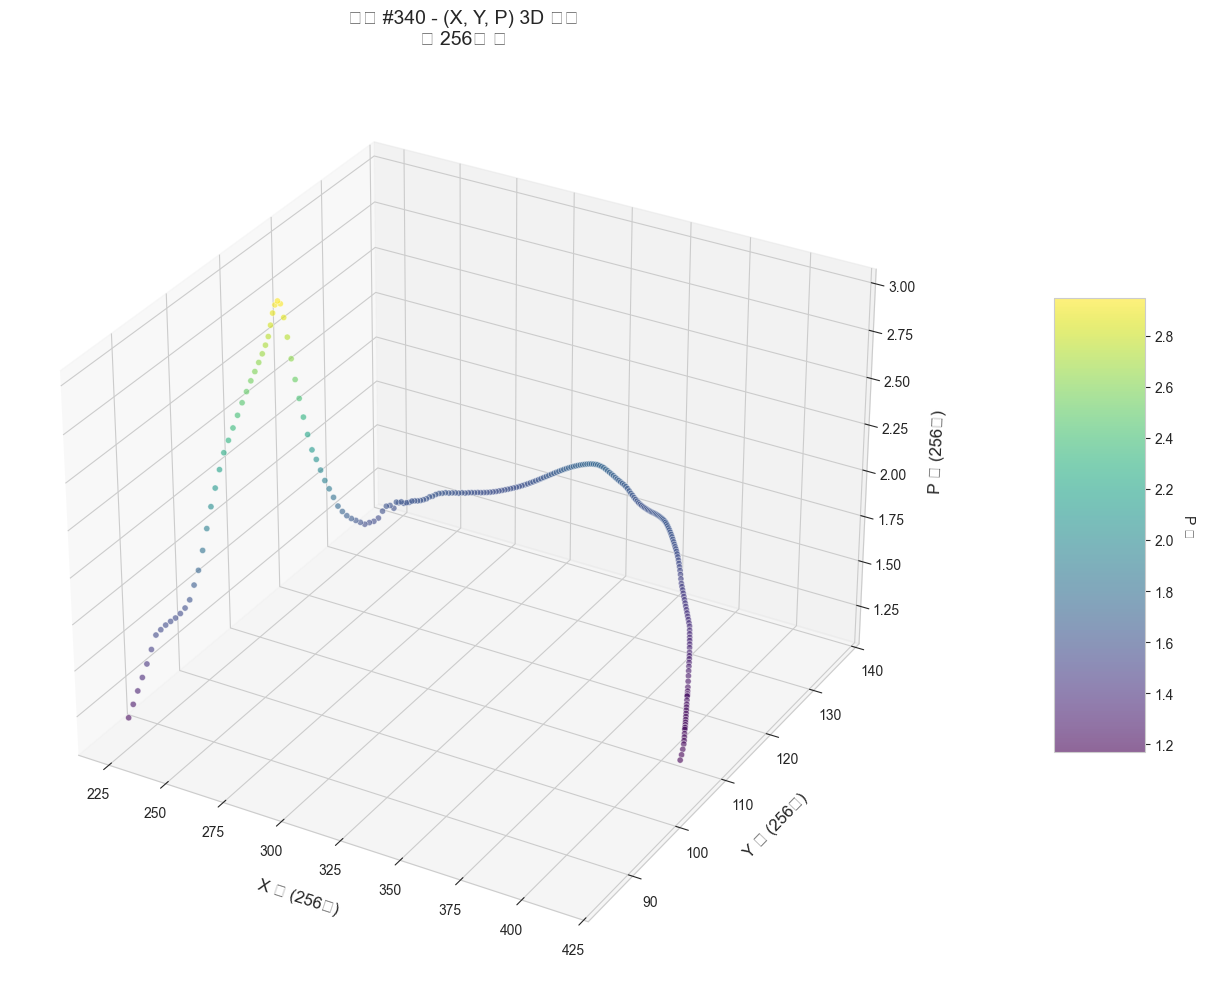

샘플 #340 통계:
  X 범위: [225.229, 413.153]
  Y 범위: [84.709, 137.019]
  P 범위: [1.168, 2.947]



In [13]:
# 첫 번째 샘플 시각화
print('=== 첫 번째 샘플 3D 시각화 ===')
plot_sample_3d(train_processed, sample_indices[0], x_cols, y_cols, p_cols)

=== 두 번째 샘플 3D 시각화 ===


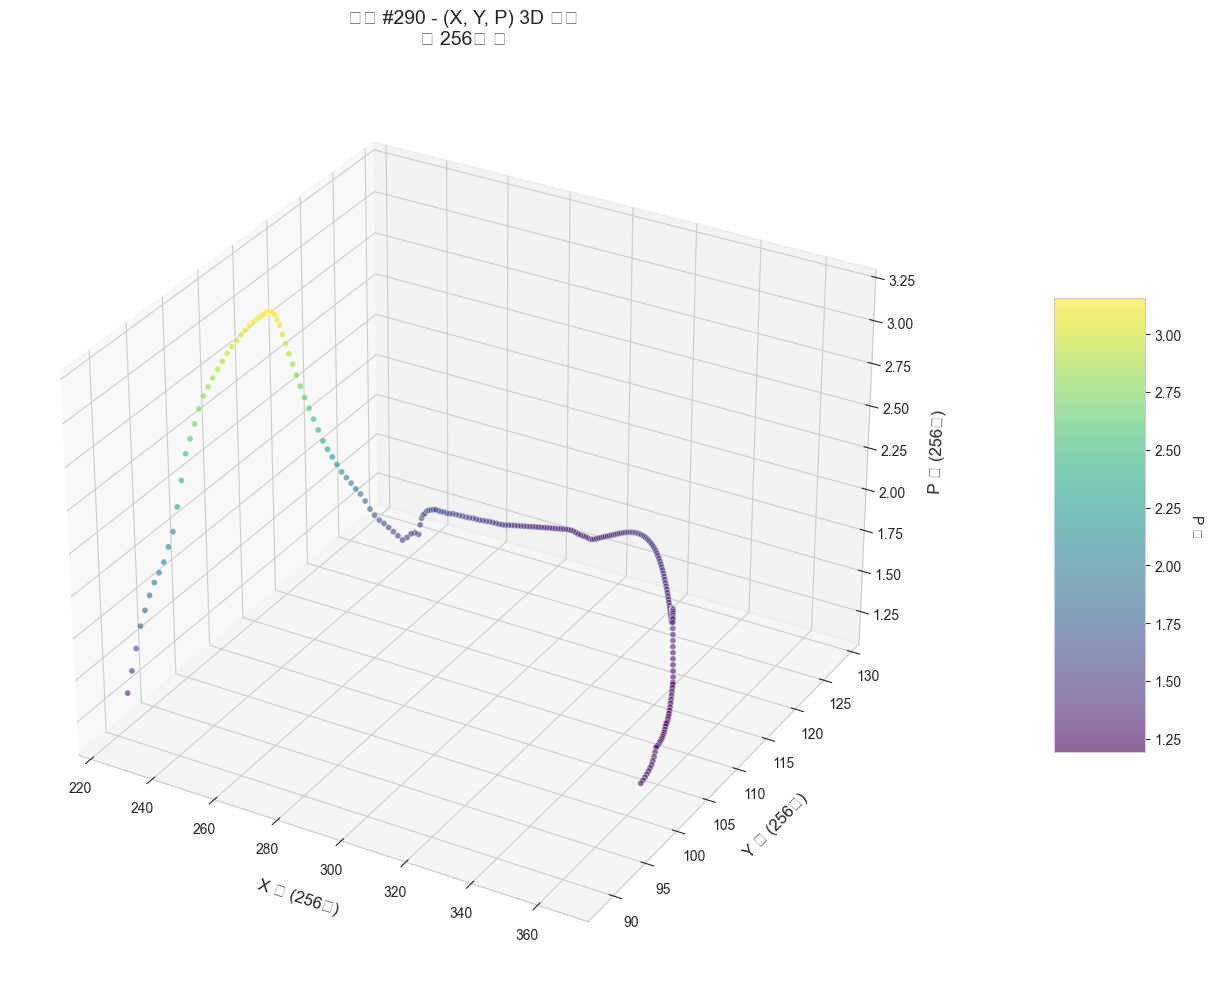

샘플 #290 통계:
  X 범위: [226.101, 364.929]
  Y 범위: [89.012, 128.515]
  P 범위: [1.192, 3.155]



In [14]:
# 두 번째 샘플 시각화
print('=== 두 번째 샘플 3D 시각화 ===')
plot_sample_3d(train_processed, sample_indices[1], x_cols, y_cols, p_cols)

=== 세 번째 샘플 3D 시각화 ===


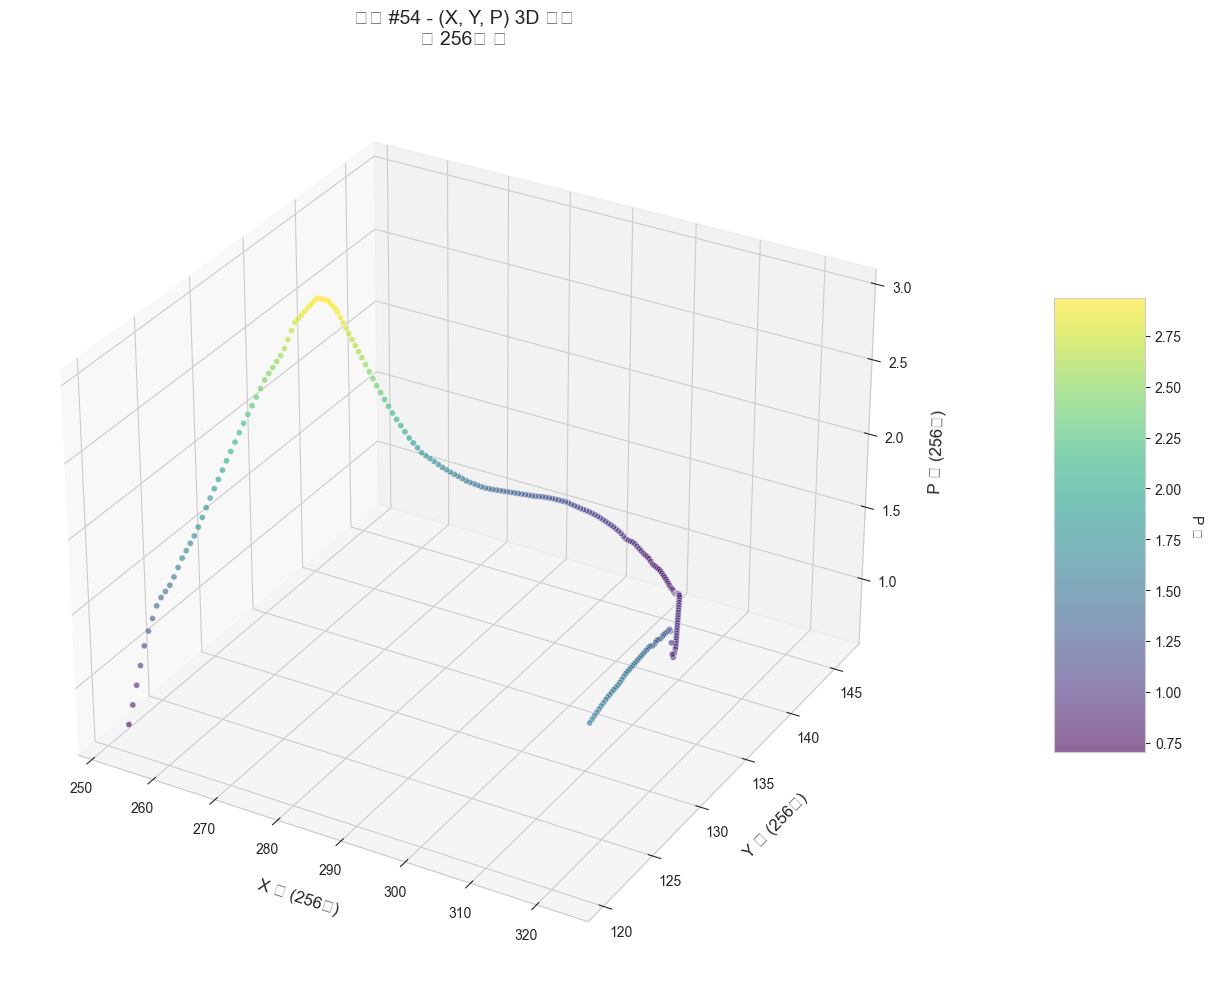

샘플 #54 통계:
  X 범위: [252.870, 322.646]
  Y 범위: [120.376, 146.014]
  P 범위: [0.703, 2.935]



In [15]:
# 세 번째 샘플 시각화
print('=== 세 번째 샘플 3D 시각화 ===')
plot_sample_3d(train_processed, sample_indices[2], x_cols, y_cols, p_cols)

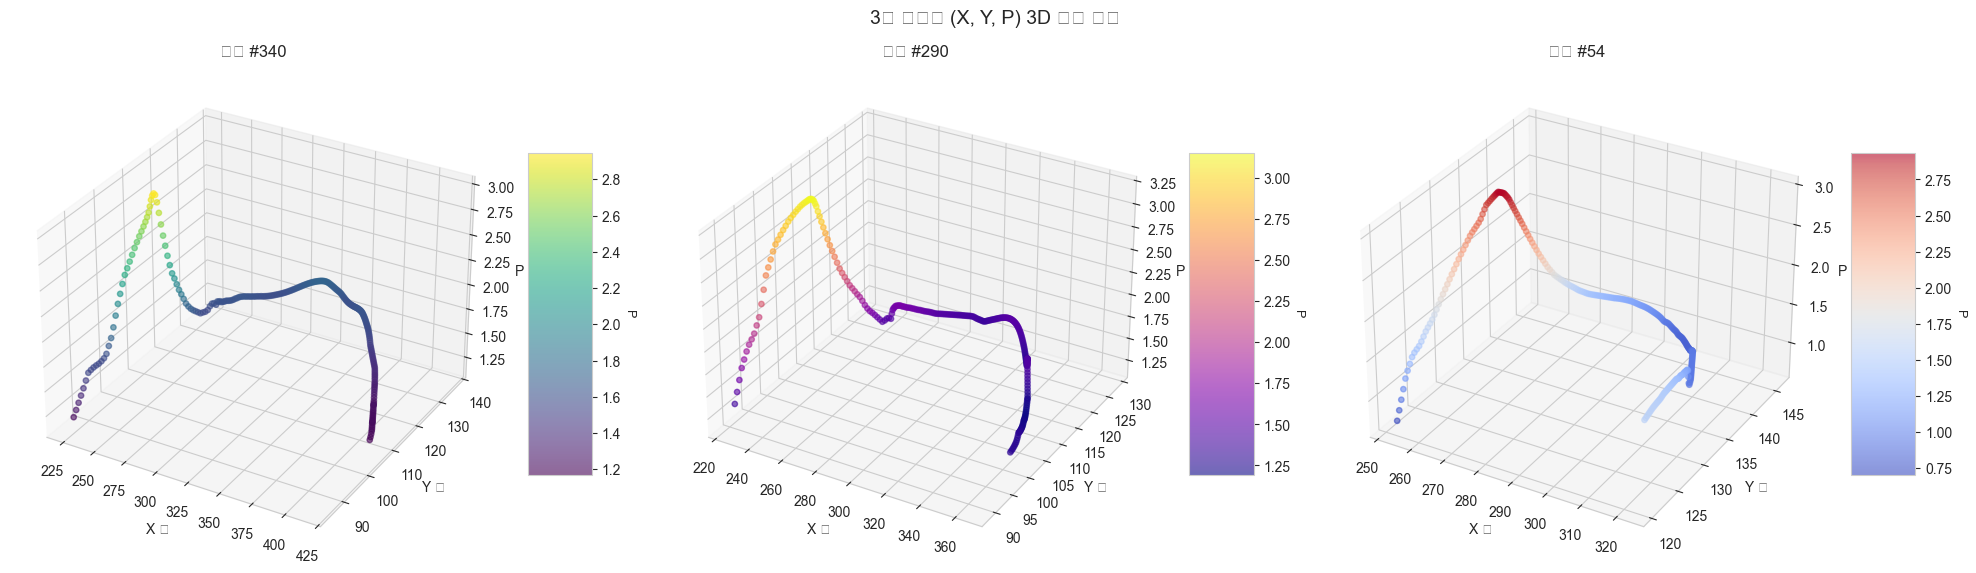

3개 샘플을 동시에 비교했습니다!


In [16]:
# 여러 샘플을 한 번에 비교 (서브플롯)
fig = plt.figure(figsize=(20, 6))

for i, sample_idx in enumerate(sample_indices):
    # 샘플 데이터 추출
    sample = train_processed.iloc[sample_idx]
    x_values = sample[x_cols].values
    y_values = sample[y_cols].values
    p_values = sample[p_cols].values
    
    # 길이 맞추기
    min_len = min(len(x_values), len(y_values), len(p_values))
    x_values = x_values[:min_len]
    y_values = y_values[:min_len]
    p_values = p_values[:min_len]
    
    # 서브플롯 생성
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    
    scatter = ax.scatter(x_values, y_values, p_values,
                        c=p_values, 
                        cmap=['viridis', 'plasma', 'coolwarm'][i],
                        alpha=0.6,
                        s=15)
    
    ax.set_xlabel('X 값', fontsize=10)
    ax.set_ylabel('Y 값', fontsize=10)
    ax.set_zlabel('P 값', fontsize=10)
    ax.set_title(f'샘플 #{sample_idx}', fontsize=12, pad=10)
    
    # 컬러바
    cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=5)
    cbar.set_label('P', rotation=270, labelpad=10, fontsize=9)

plt.suptitle('3개 샘플의 (X, Y, P) 3D 분포 비교', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

print('3개 샘플을 동시에 비교했습니다!')

### 추가 시각화 옵션

=== 다양한 시각화 방식 비교 ===


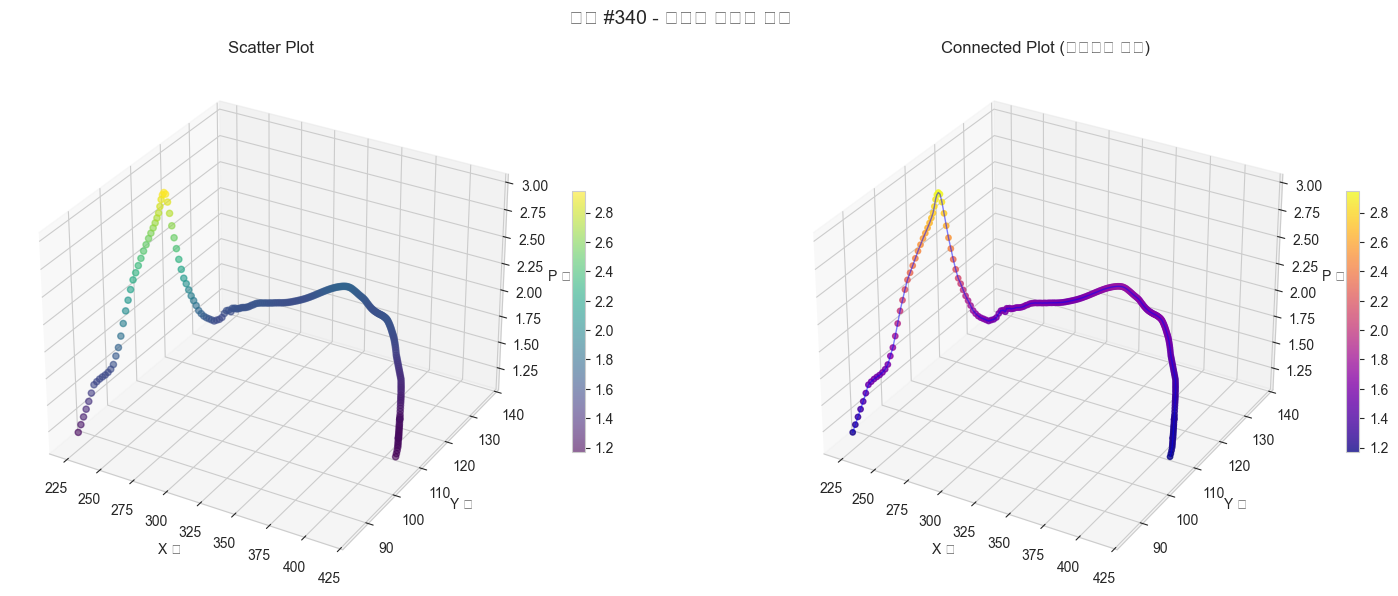

In [17]:
# 다양한 시각화 방식 비교
def plot_sample_3d_variations(data, sample_idx, x_cols, y_cols, p_cols):
    """
    Scatter와 Connected Plot 비교
    """
    sample = data.iloc[sample_idx]
    
    x_values = sample[x_cols].values
    y_values = sample[y_cols].values
    p_values = sample[p_cols].values
    
    min_len = min(len(x_values), len(y_values), len(p_values))
    x_values = x_values[:min_len]
    y_values = y_values[:min_len]
    p_values = p_values[:min_len]
    
    fig = plt.figure(figsize=(16, 6))
    
    # 왼쪽: Scatter plot
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    scatter = ax1.scatter(x_values, y_values, p_values,
                         c=p_values, cmap='viridis', alpha=0.6, s=20)
    ax1.set_xlabel('X 값')
    ax1.set_ylabel('Y 값')
    ax1.set_zlabel('P 값')
    ax1.set_title('Scatter Plot')
    plt.colorbar(scatter, ax=ax1, shrink=0.5)
    
    # 오른쪽: Line plot (인덱스에 따른 변화)
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot(x_values, y_values, p_values, 
            c='blue', alpha=0.5, linewidth=1)
    scatter2 = ax2.scatter(x_values, y_values, p_values,
                          c=p_values, cmap='plasma', s=15, alpha=0.8)
    ax2.set_xlabel('X 값')
    ax2.set_ylabel('Y 값')
    ax2.set_zlabel('P 값')
    ax2.set_title('Connected Plot (순서대로 연결)')
    plt.colorbar(scatter2, ax=ax2, shrink=0.5)
    
    plt.suptitle(f'샘플 #{sample_idx} - 다양한 시각화 방식', fontsize=14, y=0.98)
    plt.tight_layout()
    plt.show()

# 첫 번째 샘플로 테스트
print('=== 다양한 시각화 방식 비교 ===')
plot_sample_3d_variations(train_processed, sample_indices[0], x_cols, y_cols, p_cols)

=== 2D 평면 투영 시각화 ===


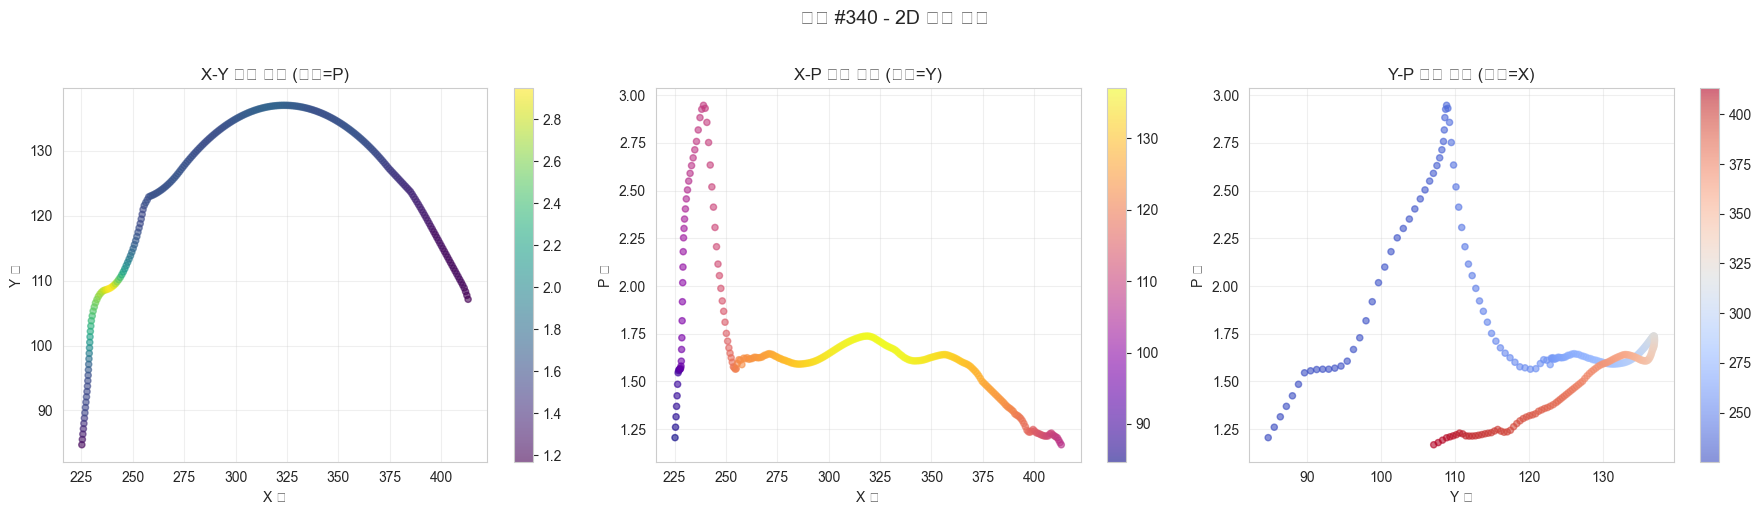

In [18]:
# 2D 투영 시각화 (X-Y, X-P, Y-P 평면)
def plot_sample_2d_projections(data, sample_idx, x_cols, y_cols, p_cols):
    """
    3D 데이터를 2D 평면에 투영하여 시각화
    """
    sample = data.iloc[sample_idx]
    
    x_values = sample[x_cols].values
    y_values = sample[y_cols].values
    p_values = sample[p_cols].values
    
    min_len = min(len(x_values), len(y_values), len(p_values))
    x_values = x_values[:min_len]
    y_values = y_values[:min_len]
    p_values = p_values[:min_len]
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # X-Y 평면 (P를 색상으로)
    scatter1 = axes[0].scatter(x_values, y_values, c=p_values, 
                               cmap='viridis', alpha=0.6, s=20)
    axes[0].set_xlabel('X 값')
    axes[0].set_ylabel('Y 값')
    axes[0].set_title('X-Y 평면 투영 (색상=P)')
    axes[0].grid(True, alpha=0.3)
    plt.colorbar(scatter1, ax=axes[0])
    
    # X-P 평면 (Y를 색상으로)
    scatter2 = axes[1].scatter(x_values, p_values, c=y_values,
                               cmap='plasma', alpha=0.6, s=20)
    axes[1].set_xlabel('X 값')
    axes[1].set_ylabel('P 값')
    axes[1].set_title('X-P 평면 투영 (색상=Y)')
    axes[1].grid(True, alpha=0.3)
    plt.colorbar(scatter2, ax=axes[1])
    
    # Y-P 평면 (X를 색상으로)
    scatter3 = axes[2].scatter(y_values, p_values, c=x_values,
                               cmap='coolwarm', alpha=0.6, s=20)
    axes[2].set_xlabel('Y 값')
    axes[2].set_ylabel('P 값')
    axes[2].set_title('Y-P 평면 투영 (색상=X)')
    axes[2].grid(True, alpha=0.3)
    plt.colorbar(scatter3, ax=axes[2])
    
    plt.suptitle(f'샘플 #{sample_idx} - 2D 평면 투영', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

# 첫 번째 샘플로 테스트
print('=== 2D 평면 투영 시각화 ===')
plot_sample_2d_projections(train_processed, sample_indices[0], x_cols, y_cols, p_cols)

## 6. 추가 분석을 위한 준비
### 여기서부터 Feature Engineering과 모델링을 진행하세요!

In [19]:
# 처리된 데이터 저장 (선택사항)
# train_processed.to_csv('train_processed.csv', index=False)
# test_processed.to_csv('test_processed.csv', index=False)
# print('처리된 데이터를 저장했습니다!')

print('\n=== 데이터 준비 완료 ===')
print(f'Train 데이터: {train_processed.shape}')
print(f'Test 데이터: {test_processed.shape}')
print('\n이제 Feature Engineering과 모델링을 진행하세요!')


=== 데이터 준비 완료 ===
Train 데이터: (720, 799)
Test 데이터: (466, 799)

이제 Feature Engineering과 모델링을 진행하세요!


---
## Feature Engineering 섹션 (직접 작성)
여기에 Feature Engineering 코드를 작성하세요

In [20]:
# Feature Engineering 코드
# TODO: 여기에 Feature Engineering 코드 작성


---
## 모델링 섹션 (직접 작성)
여기에 모델 학습 및 예측 코드를 작성하세요

In [21]:
# 모델링 코드
# TODO: 여기에 모델링 코드 작성
